In [15]:
from __future__ import print_function
import datetime
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from plotly.offline import iplot

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

### Read CSV File

In [16]:
df_train = pd.read_csv('./trainData.txt')
df_test = pd.read_csv('./testData.txt')

# Qn No. 2(a) State the number of training samples. Also, state the number of test samples? 

## Ans: Total numeber of tranining samples used here is 8143 samples and for test data 9752 samples. It can be get through using .info() command of both training and test data as per shown below

In [17]:
print(df_train.info())
df_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [18]:
print(df_test.info())
df_test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB
None


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [19]:
#removing the date coloumn
df_test['date'] = pd.to_datetime(df_test['date'])
df_train['date'] = pd.to_datetime(df_train['date'])
df_test.reset_index(drop=True, inplace=True)
df_train.reset_index(drop=True, inplace=True)

In [20]:
scaler = MinMaxScaler()
columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
scaler.fit(np.array(df_train[columns]))
df_test[columns] = scaler.transform(np.array(df_test[columns]))
df_train[columns] = scaler.transform(np.array(df_train[columns]))


## Data Visualisation

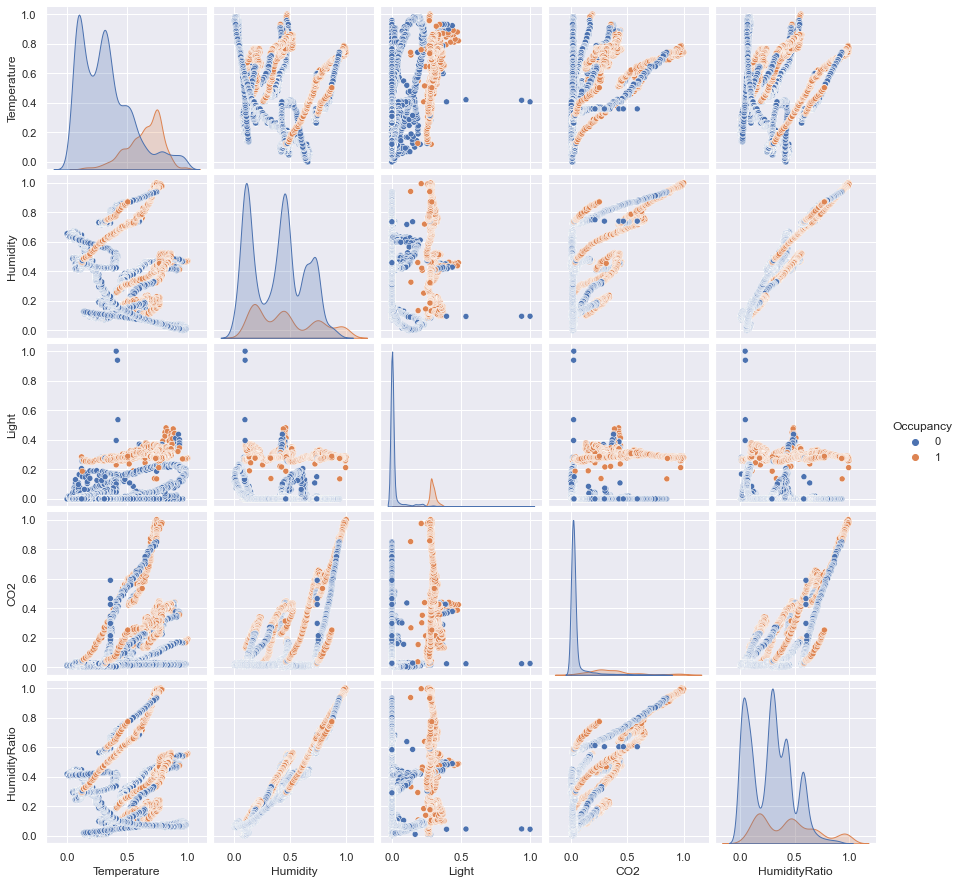

In [21]:
sns.pairplot(df_train, diag_kind='kde', hue = 'Occupancy')

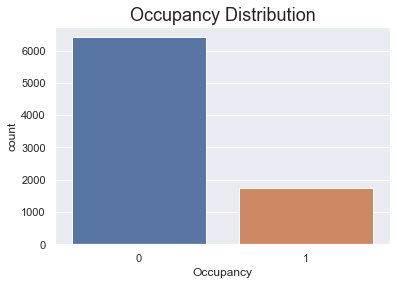

In [22]:
sns.set(style="darkgrid")
plt.title("Occupancy Distribution", fontdict={'fontsize':18})
ax = sns.countplot(x="Occupancy", data=df_train)

# Qn 2b simulation using TensorFlow and vary the number of hidden units and make a plot?

In [23]:
X_train = df_train.drop(columns=['date', 'Occupancy'], axis=1)
y_train = df_train['Occupancy']
X_test = df_test.drop(columns=['date', 'Occupancy'], axis=1)
y_test = df_test['Occupancy']

### model1 - architecture 5-h1-1 : model analysis using 32 neuron in the dense layer and then, using relu activation function in hidden layer and  sigmoid activation function in output layer

In [24]:
model1 = Sequential()
model1.add(Dense(32, activation='relu', input_dim=5))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
255/255 [==============================] - 5s 12ms/step - loss: 0.4837 - accuracy: 0.8031 - val_loss: 0.3846 - val_accuracy: 0.8261
Epoch 2/20
255/255 [==============================] - 2s 9ms/step - loss: 0.2169 - accuracy: 0.9476 - val_loss: 0.2606 - val_accuracy: 0.8700
Epoch 3/20
255/255 [==============================] - 2s 9ms/step - loss: 0.1338 - accuracy: 0.9622 - val_loss: 0.2261 - val_accuracy: 0.8842
Epoch 4/20
255/255 [==============================] - 2s 9ms/step - loss: 0.1049 - accuracy: 0.9678 - val_loss: 0.1816 - val_accuracy: 0.8966
Epoch 5/20
255/255 [==============================] - 3s 10ms/step - loss: 0.0885 - accuracy: 0.9729 - val_loss: 0.1478 - val_accuracy: 0.9274
Epoch 6/20
255/255 [==============================] - 2s 9ms/step - loss: 0.0781 - accuracy: 0.9776 - val_loss: 0.1276 - val_accuracy: 0.9523
Epoch 7/20
255/255 [==============================] - 2s 9ms/step - loss: 0.0708 - accuracy: 0.9821 - val_loss: 0.1075 - val_accuracy: 0.9662
Epoc

### model2 - architecture 5-h1-1 : model analysis using 128 neuron in the dense layer and then, using relu activation function in hidden layer and  sigmoid activation function in output layer

In [25]:
model2 = Sequential()
model2.add(Dense(128, activation='relu', input_dim=5))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
255/255 [==============================] - 6s 14ms/step - loss: 0.3658 - accuracy: 0.8665 - val_loss: 0.2593 - val_accuracy: 0.8647
Epoch 2/20
255/255 [==============================] - 2s 9ms/step - loss: 0.1227 - accuracy: 0.9649 - val_loss: 0.1973 - val_accuracy: 0.8988
Epoch 3/20
255/255 [==============================] - 2s 10ms/step - loss: 0.0846 - accuracy: 0.9736 - val_loss: 0.1353 - val_accuracy: 0.9484
Epoch 4/20
255/255 [==============================] - 2s 9ms/step - loss: 0.0683 - accuracy: 0.9821 - val_loss: 0.1080 - val_accuracy: 0.9677
Epoch 5/20
255/255 [==============================] - 3s 10ms/step - loss: 0.0608 - accuracy: 0.9859 - val_loss: 0.0821 - val_accuracy: 0.9912
Epoch 6/20
255/255 [==============================] - 2s 10ms/step - loss: 0.0566 - accuracy: 0.9864 - val_loss: 0.0710 - val_accuracy: 0.9924
Epoch 7/20
255/255 [==============================] - 2s 9ms/step - loss: 0.0543 - accuracy: 0.9871 - val_loss: 0.0641 - val_accuracy: 0.9927
Ep

In [26]:
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(loss1)), y=loss1,
                    name='Training Loss using 32 neuron in the dense layer', line=dict(color='royalblue')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss1)), y=val_loss1,
                    name='Validation Loss using 32 neuron in the dense layer', line = dict(color='firebrick')))
fig.add_trace(go.Scatter(x=np.arange(len(loss2)), y=loss2,
                    name='Training Loss using 128 neuron in the dense layer', line=dict(color='royalblue', dash='dash')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss2)), y=val_loss2,
                    name='Validation Loss using 128 neuron in the dense layer', line = dict(color='firebrick', dash='dash')))
fig.update_layout(xaxis_title='Epochs',
                  yaxis_title='Loss',
                  title={'text': "Training and Validation Losses for changing neurons in dense layer",
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)

#  Qn No. 2c Discuss (interpret) the results based on above observation?

### Ans: The above analysis done by changing the number of neuron in  dense layer (32 neuron vs 128 neuron). Based on that following observation has been made:

1. The loss has been reduced on adding more neuron in the dense layer.
2. The validation accuracy increased by adding more neuron.
3. The second case (128 neuron) are more stable than first one

# Qn No. 2d

### model3 - architecture 5-h1-h2-1 : model analysis using 128 neuron in the first dense layer, 32 neuron in second dense layer and then, using relu activation function hidden layer and sigmaoid activation function in output layer

In [27]:
model3 = Sequential()
model3.add(Dense(128, activation='relu', input_dim=5))
model3.add(Dense(32, activation='relu', input_dim=5))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
255/255 [==============================] - 6s 12ms/step - loss: 0.2342 - accuracy: 0.9199 - val_loss: 0.1391 - val_accuracy: 0.9285
Epoch 2/20
255/255 [==============================] - 3s 10ms/step - loss: 0.0574 - accuracy: 0.9853 - val_loss: 0.0586 - val_accuracy: 0.9925
Epoch 3/20
255/255 [==============================] - 3s 11ms/step - loss: 0.0509 - accuracy: 0.9875 - val_loss: 0.0489 - val_accuracy: 0.9930
Epoch 4/20
255/255 [==============================] - 2s 10ms/step - loss: 0.0486 - accuracy: 0.9883 - val_loss: 0.0443 - val_accuracy: 0.9925
Epoch 5/20
255/255 [==============================] - 3s 10ms/step - loss: 0.0462 - accuracy: 0.9883 - val_loss: 0.0452 - val_accuracy: 0.9906
Epoch 6/20
255/255 [==============================] - 2s 10ms/step - loss: 0.0450 - accuracy: 0.9882 - val_loss: 0.0463 - val_accuracy: 0.9913
Epoch 7/20
255/255 [==============================] - 2s 9ms/step - loss: 0.0434 - accuracy: 0.9885 - val_loss: 0.0433 - val_accuracy: 0.9913


In [14]:
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(len(loss1)), y=loss1,
                    name='Training Loss using 32 neuron in the dense layer', line=dict(color='royalblue')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss1)), y=val_loss1,
                    name='Validation Loss using 32 neuron in the dense layer', line = dict(color='firebrick')))
fig.add_trace(go.Scatter(x=np.arange(len(loss2)), y=loss2,
                    name='Training Loss using 128 neuron in the dense layer', line=dict(color='royalblue', dash='dash')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss2)), y=val_loss2,
                    name='Validation Loss using 128 neuron in the dense layer', line = dict(color='firebrick', dash='dash')))
fig.add_trace(go.Scatter(x=np.arange(len(loss3)), y=loss3,
                    name='Training Loss using two dense layer with 128 neuron and 32 neuron', line=dict(color='royalblue', dash='dot')))
fig.add_trace(go.Scatter(x=np.arange(len(val_loss3)), y=val_loss3,
                    name='Validation Loss using two dense layer with 128 neuron and 32 neuron', line = dict(color='firebrick', dash='dot')))
fig.update_layout(xaxis_title='Epochs',
                  yaxis_title='Loss',
                  title={'text': "Training and Validation Losses for Different Models",
                                                'x':0.5,
                                                'xanchor': 'center',
                                                'yanchor': 'top'})
iplot(fig)


In [53]:
print("Accuracy for Neural Network model on test data: {}%".format(round((model3.evaluate(X_test, y_test)[1]*100),2)))

305/305 [==============================] - 2s 5ms/step - loss: 0.0628 - accuracy: 0.9752
Accuracy for Neural Network model on test data: 97.52%


### From the above observation...     
1.accuracy for Neural Network model on test data is 97.52%.
2.Loss has been reduced                                                                                                                                                              

### ref : https://www.kaggle.com/code/turksoyomer/hvac-occupancy-detection-with-ml-and-dl-methods/notebook